In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("C:\\Users\\aneel\\Downloads\\indiancrop_dataset.csv")

In [2]:
df

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP_PRICE,CROP
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Andaman and Nicobar,7000,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Andaman and Nicobar,5000,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Andaman and Nicobar,7000,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Andaman and Nicobar,7000,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Andaman and Nicobar,120000,Rice
...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,West Bengal,1000,Coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,West Bengal,800,Coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,West Bengal,560,Coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,West Bengal,1500,Coffee


In [3]:
pd.isnull(df).sum()

N_SOIL         0
P_SOIL         0
K_SOIL         0
TEMPERATURE    0
HUMIDITY       0
ph             0
RAINFALL       0
STATE          0
CROP_PRICE     0
CROP           0
dtype: int64

In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['STATE']=le.fit_transform(df['STATE'])

In [5]:
df

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP_PRICE,CROP
0,90,42,43,20.879744,82.002744,6.502985,202.935536,0,7000,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,0,5000,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,0,7000,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,0,7000,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,0,120000,Rice
...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,25,1000,Coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,25,800,Coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,25,560,Coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,25,1500,Coffee


In [6]:
x=df.iloc[:,:9]
x

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP_PRICE
0,90,42,43,20.879744,82.002744,6.502985,202.935536,0,7000
1,85,58,41,21.770462,80.319644,7.038096,226.655537,0,5000
2,60,55,44,23.004459,82.320763,7.840207,263.964248,0,7000
3,74,35,40,26.491096,80.158363,6.980401,242.864034,0,7000
4,78,42,42,20.130175,81.604873,7.628473,262.717340,0,120000
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,25,1000
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,25,800
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,25,560
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,25,1500


In [7]:
y=df.iloc[:,-1]
y

0         Rice
1         Rice
2         Rice
3         Rice
4         Rice
         ...  
2195    Coffee
2196    Coffee
2197    Coffee
2198    Coffee
2199    Coffee
Name: CROP, Length: 2200, dtype: object

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=49)

In [9]:
from sklearn.feature_selection import SelectFromModel
sel=SelectFromModel(RandomForestClassifier(n_estimators=100))
sel.fit(x_train,y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [10]:
sel.get_support()

array([False,  True,  True, False,  True, False,  True,  True, False])

In [11]:
selected_feat=x_train.columns[(sel.get_support())]
len(selected_feat)

5

In [12]:
selected_feat

Index(['P_SOIL', 'K_SOIL', 'HUMIDITY', 'RAINFALL', 'STATE'], dtype='object')

In [13]:
x_train=x_train.iloc[:,[1,2,4,6,7]]
x_test=x_test.iloc[:,[1,2,4,6,7]]

In [14]:
x_train

,P_SOIL,K_SOIL,HUMIDITY,RAINFALL,STATE
532,45,15,60.983538,33.841108,10
2051,46,42,78.459597,155.385153,23
1333,5,47,84.844946,51.194702,20
1912,38,15,75.882986,69.915635,23
1586,129,205,91.157616,118.683273,23
...,...,...,...,...,...
892,73,25,63.132153,45.208411,13
908,27,41,94.276596,108.042355,13
424,71,24,38.409755,139.648332,10
1709,64,47,94.507669,186.676232,23


In [15]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [16]:
y_pred=rfc.predict(x_test)

In [17]:
np.stack((y_test,y_pred),axis=1)#Actual vs Predicted value

array([['Watermelon', 'Watermelon'],
       ['ChickPea', 'ChickPea'],
       ['MungBean', 'MungBean'],
       ...,
       ['PigeonPeas', 'PigeonPeas'],
       ['MothBeans', 'MothBeans'],
       ['Jute', 'Jute']], dtype=object)

In [18]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

rf = RandomForestClassifier()


rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)


rand_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002058F0B4580>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002058F0A9430>})

In [19]:
best_rf = rand_search.best_estimator_

print('Best hyperparameters:',  rand_search.best_params_)


Best hyperparameters: {'max_depth': 6, 'n_estimators': 148}


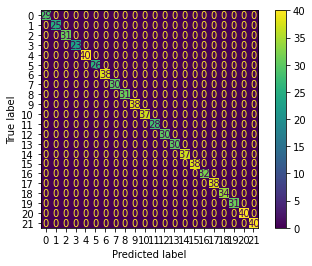

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
y_pred = best_rf.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [21]:
accuracy = accuracy_score(y_test, y_pred)*100

print("Accuracy:", accuracy)

Accuracy: 100.0


In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        29
      Banana       1.00      1.00      1.00        25
   Blackgram       1.00      1.00      1.00        31
    ChickPea       1.00      1.00      1.00        23
     Coconut       1.00      1.00      1.00        40
      Coffee       1.00      1.00      1.00        26
      Cotton       1.00      1.00      1.00        38
      Grapes       1.00      1.00      1.00        30
        Jute       1.00      1.00      1.00        31
 KidneyBeans       1.00      1.00      1.00        38
      Lentil       1.00      1.00      1.00        37
       Maize       1.00      1.00      1.00        28
       Mango       1.00      1.00      1.00        30
   MothBeans       1.00      1.00      1.00        30
    MungBean       1.00      1.00      1.00        37
   Muskmelon       1.00      1.00      1.00        38
      Orange       1.00      1.00      1.00        32
      Papaya       1.00    